# SEGMENTATION DE LA CLIENTELE D'UN MALL A L' AIDE DU KMEANS CLUSTERING

**Romuald KOUADIO** Data Analyst - Data Scientist

# Introduction

L'objectif de ce projet est de développer un modèle de clustering qui pourra etre utilisé pour la segmentation des clients d'un Centre commercial, Mall, épicéries , etc...
Nous allons utiliser un jeu de données public que j'ai téléchargé pour construire cet outil de clustering.
Il contient **200** observations (chaque entrée donne des information sur un client) et **5** colonnes:

- CustomerID (numero identifiant du client) => variable numérique
- Genre (homme/femme) => variable catégorielle
- Age => variable numérique
- Annual Income (k$) qui signifie revenu annuel du client exprimé en milliers de dollars US => variable numérique
- Spending Score (1-100) qui signifie score de dépenses du client mise à l'échelle de 1 à 100. => variable numérique

# Les dépendances

In [1]:
#Importer les librairies 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings("ignore")

# 1- Collecte des données 

In [2]:
#Importer les données 
df = pd.read_csv("C:/Users/Romual/Desktop/Mall_Customers_dataset.csv")

In [3]:
#Les cinq premières lignes de ma dataframe
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Les cinq dernières lignes de ma dataframe
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
#Les dimensions de notre jeu de données 
df.shape

(200, 5)

# 2- Exploration des données 

In [6]:
#Aperçu des variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#Créons une fonction qui nous permettra de compter le nombre de valeurs manquantes et de calculer leur pourcentage
#pour chaque variables
cm = sns.light_palette("pink", as_cmap = True)
def missing_value_table(donnees):
    missing_value = donnees.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * donnees.isna().sum()//len(donnees)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0:'Données manquantes', 1:'%Taux'})
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return

missing_value_table(df)

,Données manquantes,%Taux
Spending Score (1-100),0,0
Annual Income (k$),0,0
Age,0,0
Genre,0,0
CustomerID,0,0


Notre dataset est propre. Il ne contient pas de **Valeurs Manquantes**.

# Analyse univariée 

In [8]:
#Quelques stats descriptives
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


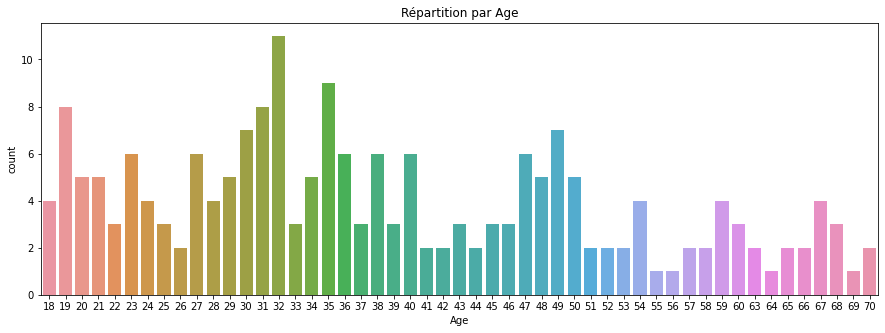

In [9]:
#Répartition de la clientèle par Age
plt.figure(figsize =(15,5))
ax = sns.countplot(x = "Age", data=df).set_title('Répartition par Age');

<AxesSubplot:xlabel='Age', ylabel='Count'>

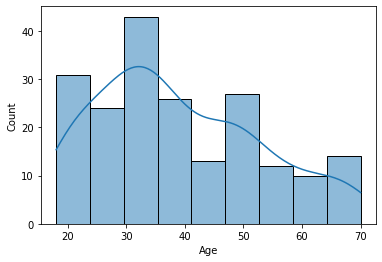

In [10]:
sns.histplot(data=df, x="Age", kde=True)

In [11]:
print("L'age minimum de notre clientèle est de : {} ans".format(df['Age'].min()))
print("L'age médian de notre clientèle est de : {} ans".format(df['Age'].median()))
print("L'age moyen de notre clientèle est de : {} ans".format(df['Age'].mean()))
print("L'age maximum de notre clientèle est de : {} ans".format(df['Age'].max()))
print("L'écart-type de l'age de notre clientèle est de : {} ans".format(df['Age'].std()))

L'age minimum de notre clientèle est de : 18 ans
L'age médian de notre clientèle est de : 36.0 ans
L'age moyen de notre clientèle est de : 38.85 ans
L'age maximum de notre clientèle est de : 70 ans
L'écart-type de l'age de notre clientèle est de : 13.969007331558883 ans


La distribution de l'age de notre clientèle suit une loi de probabilité normale. La courbe de sa densité est en forme de cloche. 
- **Un coefficient d'asymétrie positif** indique une distribution décalée à gauche de la médiane, et donc une queue de distribution étalée vers la droite.

Pour avoir une vue plus claire sur les groupes d'ages les plus rentables nous allons par la suite **discrétiser** la variable Age.

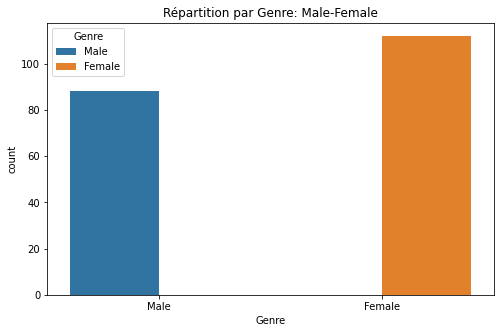

In [12]:
#Répartition de la clientèle par Genre
plt.figure(figsize =(8,5))
ax = sns.countplot(x = "Genre", data=df,hue= "Genre").set_title('Répartition par Genre: Male-Female');

In [13]:
#Observons la fréquence par Genre 
df['Genre'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Genre, dtype: float64

Nous avons **56%** de nos clients qui sont des ***femmes*** et **44%** qui sont des ***hommes***.

# Observons les distributions de nos variables 

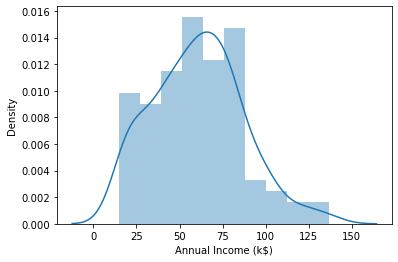

In [14]:
sns.distplot(df['Annual Income (k$)']);

In [15]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

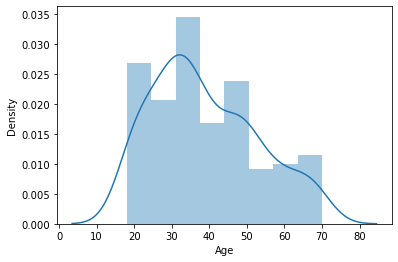

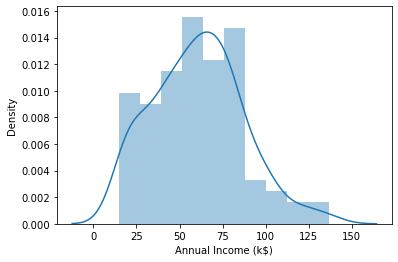

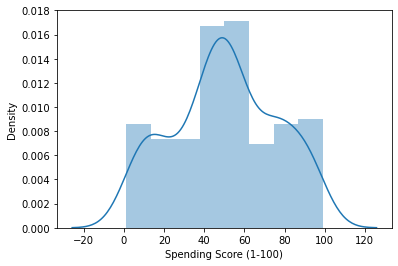

In [16]:
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

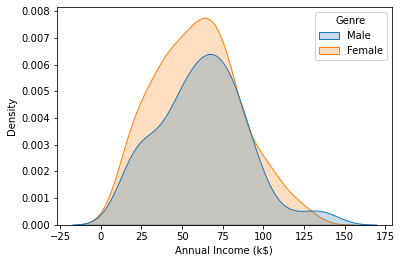

In [17]:
sns.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Genre']);

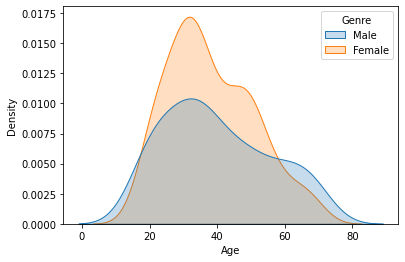

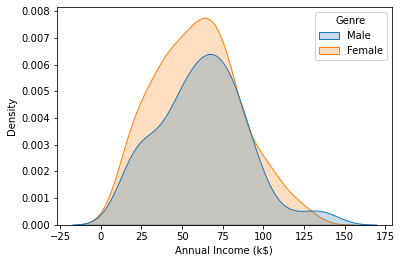

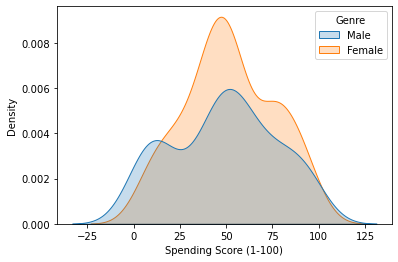

In [18]:
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Genre']);

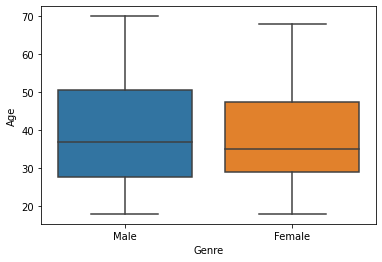

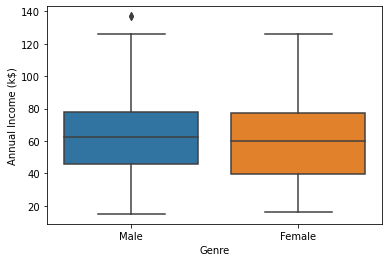

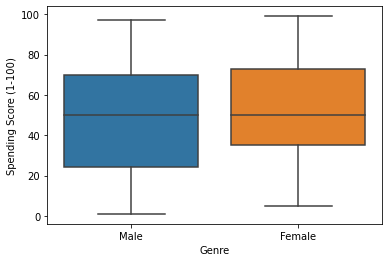

In [19]:
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Genre',y=df[i]);

# Observation du revenu annuel 

In [20]:
df.groupby(['Genre'])['Annual Income (k$)'].mean()

Genre
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

- Le revenu annuel moyen pour les hommes est de **62,23 k dollars**.
- Le revenu annuel moyen pour les femmes est de **59,25 k dollars**.
- On observe un outlier (valeur aberrante) au niveau du revenu annuel des hommes.
Un outlier ou valeur aberrante correspond à une valeur éloignée de la distribution de la variable. Cela pourra être dû à une erreur de typographie ou à une erreur de mesure mais cela pourra également être une valeur extrême. On parle couramment de valeur extrême, pour désigner une valeur non erronée qui s’éloigne néanmoins fortement du reste des valeurs de la variable. 
Essayon de voir un peu plus clair sur cette valeur aberrante.

# Vue sur les outliers

Pour obtenir nos outliers, nous allons calculer le premier quartile, troisième quartile, l'écart interquartile, ainsi que les bornes supérieures et inférieures.

In [21]:
#On calcule Q1
q1=df["Annual Income (k$)"].quantile(q=0.25)
q1

41.5

In [22]:
#On calcule Q3
q3=df["Annual Income (k$)"].quantile(q=0.75)
q3

78.0

In [23]:
#On calcule l'écart interquartile (IQR)
IQR=q3-q1
IQR

36.5

In [24]:
#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile
borne_inf = q1-1.5*IQR
borne_inf

-13.25

In [25]:
#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
borne_sup = q3 +1.5*IQR
borne_sup

132.75

In [26]:
#On garde les valeurs à l'intérieur de la borne inférieure et supérieure
df_outliers1= df[df["Annual Income (k$)"]<borne_sup]
df_outliers2=df[df["Annual Income (k$)"]>borne_inf]

In [27]:
df_outliers1['Annual Income (k$)'].min()

15

In [28]:
df_outliers2['Annual Income (k$)'].max()

137

In [29]:
print("L'outlier que nous avons visualisé plus haut sur le box-plot des Revenus annuels des Hommes est de:{} k dollars US".format(df_outliers2['Annual Income (k$)'].max()))

L'outlier que nous avons visualisé plus haut sur le box-plot des Revenus annuels des Hommes est de:137 k dollars US


In [30]:
#Interprètation du box-plot (Age-Genre)

- Il y a plus d'hommes agés que de femmes agées au sein de notre clientèle.

In [31]:
#Interprètation du box-plot (Annual Income-Genre)

- Le revenu annuel de la clientèle des hommes est plus élevé que celui des femmes.

In [32]:
#Interprètation du box-plot (Spending scores-Genre)

- Les femmes ont un score de dépenses plus élevé que les hommes.

# Analyse bivariée

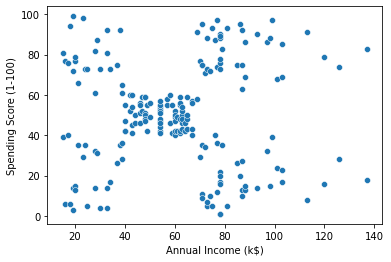

In [33]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)');

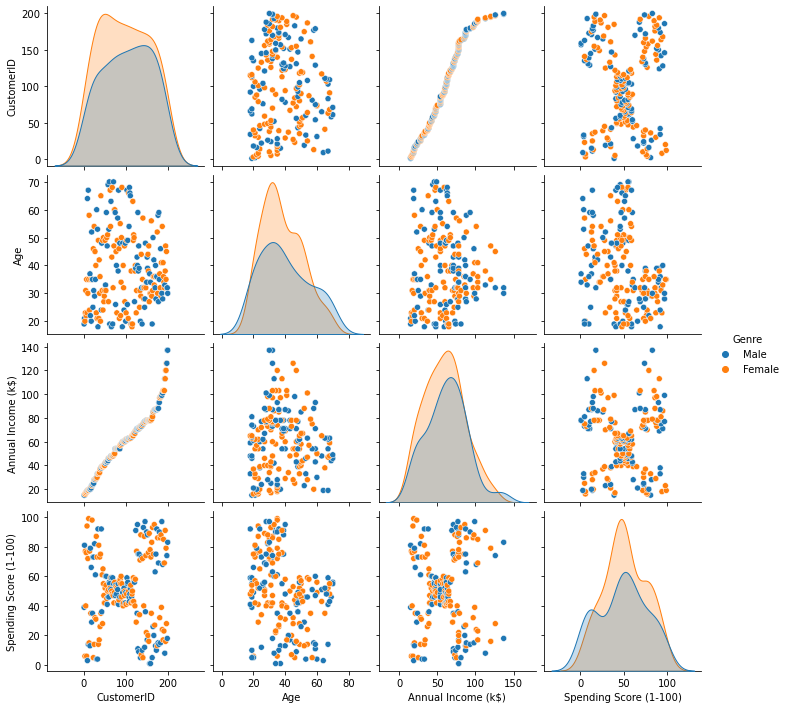

In [34]:
#df= df.drop('CustomerID', axis=1)
sns.pairplot(df, hue='Genre')

In [35]:
df.groupby(['Genre'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean().style.background_gradient(cmap=cm)

,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [36]:
df.corr().style.background_gradient(cmap=cm)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

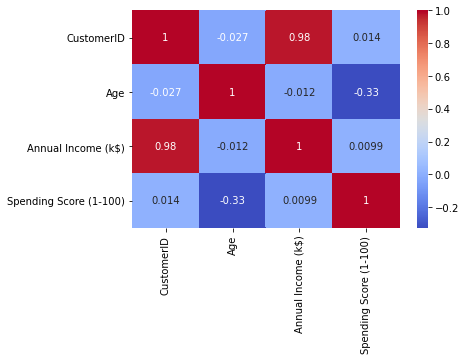

In [37]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Les colonnes 'Annual Income (k$)' et 'Spending Score (1-100)' sont les plus corrélées.

La colonne CustomerID ne doit pas etre pris en compte 

# Clustering univarié, bivarié, multivarié

# 1- Clustering univarié

In [38]:
clustering1 = KMeans(n_clusters=3)

In [39]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [40]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [41]:
df['Income cluster'] = clustering1.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [42]:
df['Income cluster'].value_counts()

0    90
1    74
2    36
Name: Income cluster, dtype: int64

In [43]:
clustering1.inertia_

23517.33093093092

In [44]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [45]:
inertia_scores

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5050.904761904766,
 3949.275613275612,
 2906.603601953602,
 2168.478715728716,
 1736.5656510156507]

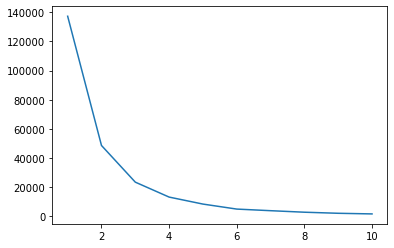

In [46]:
#Elbow method
plt.plot(range(1,11), inertia_scores);

Grace à la méthode de Elbow nous avons retenu 3 clusters pour le clustering1

In [47]:
#L'age moyen, les revenus moyens et les scores d'achat moyen de nos trois (3) clusters retenus
df.groupby(['Income cluster'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean().style.background_gradient(cmap=cm)

,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


Ce tableau nous donnes la moyenne d'age, de revenu annuel et de score de dépenses de nos trois (3) clusters.

# 2- Clustering bivarié

In [48]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income cluster'] = clustering2.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,3


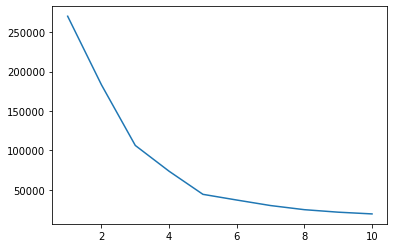

In [49]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

Grace à la méthode de Elbow nous avons retenu 5 clusters optimales du clustering2

In [50]:
#Mettons nos centroids dans une dataframe à deux colonnes x et y. Cela va nous permettre de les placer sur notre graphique
centers2 = pd.DataFrame(clustering2.cluster_centers_)
centers2.columns = ['x','y']

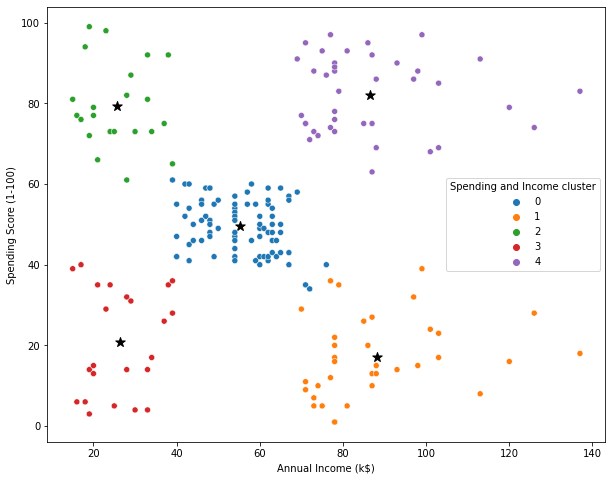

In [51]:
#Traçons notre graphique afin de visualiser nos différents clusters retenus avec leurs centroids 
plt.figure(figsize=(10,8))
plt.scatter(x=centers2['x'],y=centers2['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income cluster',palette='tab10');
plt.savefig('Clustering_bivariate_png')

In [52]:
#Tableau de contingence ou tableau croisé de notre clustering nommé 'Spending and Income cluster' par genre
pd.crosstab(df['Spending and Income cluster'], df['Genre'], normalize='index').style.background_gradient(cmap=cm)

Genre,Female,Male
Spending and Income cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.590909,0.409091
3,0.608696,0.391304
4,0.538462,0.461538


Ce tableau nous donnes la proportion d'hommes et de femmes de nos cinq (5) groupes du clustering2.
Nous remarquons qu'au niveau du groupe le plus rentable (groupe 4), il y a **54%** de femmes et **46%** d'hommes.

In [53]:
#Tableau de contingence ou tableau croisé de notre clustering nommé 'Spending and Income cluster' par l'Age moyen,
#les revenus annuels moyens et les scores d'achat moyens
df.groupby('Spending and Income cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean().style.background_gradient(cmap=cm)

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,25.272727,25.727273,79.363636
3,45.217391,26.304348,20.913043
4,32.692308,86.538462,82.128205


# 3- Clustering multivarié

Afin de réaliser notre clustering sur plusieurs variables de notre dataset, nous allons mettre à l'échelle nos données

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
df.head()

In [ ]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

In [ ]:
dff.columns

In [ ]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male']]
dff.head()

In [ ]:
dff = scale.fit_transform(dff)

In [ ]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

In [ ]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [ ]:
df

In [ ]:
#Enregistrer nos données 
df.to_csv('Clustering.csv')

# Interprètation des données et recommandations

le groupe cible serait **le groupe 4** en **violet** de notre clustering2 qui a un score de dépenses élevé et un revenu élevé

**54%** des acheteurs du groupe 4 de notre clustering2 **sont des femmes**. Nous devons rechercher des moyens d'attirer ces clients à l'aide d'une campagne marketing ciblant les articles populaires de ce cluster.

**le groupe 2** en vert présente une opportunité intéressante. L'on pourrait cibler cette clientèle afin de leur proposer des articles populaires (à valeurs élevé) dans une campagne marketing future. Car ce groupe a un score de dépense élevé mais éssentiellement sur des articles à faibles valeurs.